<a href="https://colab.research.google.com/github/AlexMourao19/Machine-Learning-Assignments/blob/main/ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

### Student 1: Ruben
### Student 2: Alex

## 1. Neural Networks

Consider the following fully connected neural network. It consists of an input layer, three hidden layers and an output layer. The first hidden layer utilized ReLU as its non-linearity function, whereas the second uses Tanh and the last uses the Sigmoid function. The output layer also utilizes the Sigmoid function. Consider $W_1, W_2, W_3 $and $W_4$ as a set of weight parameters, $x$ as your input, $y$ as the ground-truth and $\hat{y}$ as the network prediction/output.

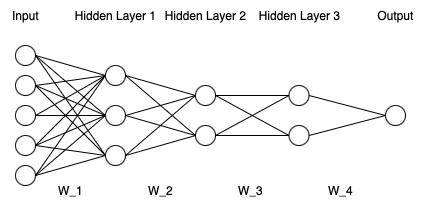

### 1.1 (Pen and Paper)

##### Note that python should not be used.

**a)** How many parameters does this network have? Do not forget to include the bias in the three hidden layers and the output layer.  Explicitly show how you achieved your answer.

*YOUR ANSWER HERE* (either typeset or a digitalization of your handwritten answer)

**b)** Considering the following cost/loss function $C(\hat{y}) = \frac{1}{2}||\hat{y} - y||^2$, derive $\frac{\partial C}{\partial W_1}$. Explicitly show the relation between $\frac{\partial C}{\partial W_1}$ and $\frac{\partial C}{\partial W_2}$.

*YOUR ANSWER HERE* (either typeset or a digitalization of your handwritten answer)

**c)** What is the behaviour of the network if we initialize all weights to zero? What causes such behaviour?

Inicializar todos os pesos a 0 irá levar há existencia de 0 derivadas e o algoritmo nunca se move, logo a neural network nunca aprende.

## 2. Neural Networks

### (Python Exercise)

Consider the `heightWeightData.txt` dataset that you have used in the Lab classes. You will use this data to build a Neural Network classifier that predicts the sex of an individual given their height and weight.

**a)** Train a fully-connected neural network classifier, with less than **20 parameters**, **using only the first 120 rows** of the dataset as training data. You should use the Keras framework. Utilize sigmoid as the non-linearity function, SGD as the optimizer, a batch size of 120, and a learning rate of 0,001. Do not change other configuration besides the number and size of the hidden layers, and the others previously mentioned. **Print the values of the learned parameters.**

In [ ]:
# YOUR CODE HERE
import tensorflow
import numpy as np
from sklearn import preprocessing

#data
data=np.genfromtxt('heightWeightData.txt', delimiter=',')

y, x= data[:,0].astype(int), data[:,1:]

y[y==2]=0

ytrain, xtrain= y[0:120], x[0:120]
ytest, xtest= y[120:], x[120:]

scaler= preprocessing.StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.fit_transform(xtest)


#model
model=tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(4,input_dim=2,activation='sigmoid'))
model.add(tensorflow.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='mean_absolute_error',optimizer=sgd,metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=120)

print()




Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 4)                 12        
                                                                 
 dense_37 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 483ms/step - loss: 0.3827 - accuracy: 0.6167



**b)** Compute the predictions of your model in the remaining 90 rows of the dataset and report the classification accuracy of your model in this test set.

In [ ]:
# YOUR CODE HERE

yres=model.predict(xtest)

train_acc = model.evaluate(xtrain, ytrain)
test_acc = model.evaluate(xtest, ytest)
print('Classification accuracy on Train set:', (train_acc[1]))
print('Classification accuracy on Test set:', (test_acc[1]))




3/3 [==============================] - 0s 7ms/step - loss: 0.3279 - accuracy: 0.7000
Classification accuracy on Train set: 0.6166666746139526
Classification accuracy on Test set: 0.699999988079071


**c)** Repeat a) and b) with a network with up to **400 parameters**. There is no need to print the learned parameters.

In [ ]:
# YOUR CODE HERE
import tensorflow
import numpy as np
from sklearn import preprocessing

#data
data=np.genfromtxt('heightWeightData.txt', delimiter=',')

y, x= data[:,0].astype(int), data[:,1:]

y[y==2]=0

ytrain, xtrain= y[0:120], x[0:120]
ytest, xtest= y[120:], x[120:]

scaler= preprocessing.StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.fit_transform(xtest)


#model
model=tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(20,input_dim=2,activation='sigmoid'))
model.add(tensorflow.keras.layers.Dense(10,activation='sigmoid'))
model.add(tensorflow.keras.layers.Dense(5,activation='sigmoid'))
model.add(tensorflow.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='mean_absolute_error',optimizer=sgd,metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=120)

print()

yres=model.predict(xtest)

train_acc = model.evaluate(xtrain, ytrain)
test_acc = model.evaluate(xtest, ytest)

print('Classification accuracy Trainning Set', (train_acc[1]))
print('Classification accuracy Test Set:', (test_acc[1]))




Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 20)                60        
                                                                 
 dense_88 (Dense)            (None, 10)                210       
                                                                 
 dense_89 (Dense)            (None, 5)                 55        
                                                                 
 dense_90 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 815ms/step - loss: 0.4782 - accuracy: 0.6167

3/3 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.7000
Classification

**d)** Repeat c), but add $L_2$ regularization.  Try the all following **$\lambda \in$  {0.1, 0.3, 0.5, 0.9}.**

In [ ]:
# YOUR CODE HERE
import tensorflow
import numpy as np
from sklearn import preprocessing

#data
data=np.genfromtxt('heightWeightData.txt', delimiter=',')

y, x= data[:,0].astype(int), data[:,1:]

y[y==2]=0

ytrain, xtrain= y[0:120], x[0:120]
ytest, xtest= y[120:], x[120:]

scaler= preprocessing.StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.fit_transform(xtest)

l2=tensorflow.keras.regularizers.L2(0.1)

#model
model=tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(20,input_dim=2,activation='sigmoid', bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(10,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(5,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(1,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.summary()

sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='mean_absolute_error',optimizer=sgd,metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=120)

print()

yres=model.predict(xtest)

train_acc = model.evaluate(xtrain, ytrain)
test_acc = model.evaluate(xtest, ytest)

print('Classification accuracy on Train set:', (train_acc[1]))
print('Classification accuracy on Test set:', (test_acc[1]))



Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 20)                60        
                                                                 
 dense_156 (Dense)           (None, 10)                210       
                                                                 
 dense_157 (Dense)           (None, 5)                 55        
                                                                 
 dense_158 (Dense)           (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 582ms/step - loss: 3.1237 - accuracy: 0.6167

3/3 [==============================] - 0s 4ms/step - loss: 3.1208 - accuracy: 0.7000
Classification

In [ ]:
#
import tensorflow
import numpy as np
from sklearn import preprocessing

#data
data=np.genfromtxt('heightWeightData.txt', delimiter=',')

y, x= data[:,0].astype(int), data[:,1:]

y[y==2]=0

ytrain, xtrain= y[0:120], x[0:120]
ytest, xtest= y[120:], x[120:]

scaler= preprocessing.StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.fit_transform(xtest)

l2=tensorflow.keras.regularizers.L2(0.3)

#model
model=tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(20,input_dim=2,activation='sigmoid', bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(10,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(5,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(1,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.summary()

sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='mean_absolute_error',optimizer=sgd,metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=120)

print()

yres=model.predict(xtest)

train_acc = model.evaluate(xtrain, ytrain)
test_acc = model.evaluate(xtest, ytest)

print('Classification accuracy on Train set:', (train_acc[1]))
print('Classification accuracy on Test set:', (test_acc[1]))

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_159 (Dense)           (None, 20)                60        
                                                                 
 dense_160 (Dense)           (None, 10)                210       
                                                                 
 dense_161 (Dense)           (None, 5)                 55        
                                                                 
 dense_162 (Dense)           (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 618ms/step - loss: 8.3888 - accuracy: 0.6167

3/3 [==============================] - 0s 3ms/step - loss: 8.3492 - accuracy: 0.7000
Classification

In [ ]:
# YOUR CODE HERE
import tensorflow
import numpy as np
from sklearn import preprocessing

#data
data=np.genfromtxt('heightWeightData.txt', delimiter=',')

y, x= data[:,0].astype(int), data[:,1:]

y[y==2]=0

ytrain, xtrain= y[0:120], x[0:120]
ytest, xtest= y[120:], x[120:]

scaler= preprocessing.StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.fit_transform(xtest)

l2=tensorflow.keras.regularizers.L2(0.5)

#model
model=tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(20,input_dim=2,activation='sigmoid', bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(10,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(5,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(1,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.summary()

sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='mean_absolute_error',optimizer=sgd,metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=120)

print()

yres=model.predict(xtest)

train_acc = model.evaluate(xtrain, ytrain)
test_acc = model.evaluate(xtest, ytest)

print('Classification accuracy on Train set:', (train_acc[1]))
print('Classification accuracy on Test set:', (test_acc[1]))

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_163 (Dense)           (None, 20)                60        
                                                                 
 dense_164 (Dense)           (None, 10)                210       
                                                                 
 dense_165 (Dense)           (None, 5)                 55        
                                                                 
 dense_166 (Dense)           (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 628ms/step - loss: 13.5731 - accuracy: 0.6167

3/3 [==============================] - 0s 2ms/step - loss: 13.5152 - accuracy: 0.7000
Classificati

In [ ]:
# YOUR CODE HERE
import tensorflow
import numpy as np
from sklearn import preprocessing

#data
data=np.genfromtxt('heightWeightData.txt', delimiter=',')

y, x= data[:,0].astype(int), data[:,1:]

y[y==2]=0

ytrain, xtrain= y[0:120], x[0:120]
ytest, xtest= y[120:], x[120:]

scaler= preprocessing.StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.fit_transform(xtest)

l2=tensorflow.keras.regularizers.L2(0.9)

#model
model=tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Dense(20,input_dim=2,activation='sigmoid', bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(10,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(5,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.add(tensorflow.keras.layers.Dense(1,activation='sigmoid',bias_regularizer=l2, kernel_regularizer=l2))
model.summary()

sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='mean_absolute_error',optimizer=sgd,metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=120)

print()

yres=model.predict(xtest)

train_acc = model.evaluate(xtrain, ytrain)
test_acc = model.evaluate(xtest, ytest)

print('Classification accuracy on Train set:', (train_acc[1]))
print('Classification accuracy on Test set:', (test_acc[1]))

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 20)                60        
                                                                 
 dense_168 (Dense)           (None, 10)                210       
                                                                 
 dense_169 (Dense)           (None, 5)                 55        
                                                                 
 dense_170 (Dense)           (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 1s 756ms/step - loss: 21.7184 - accuracy: 0.3833

3/3 [==============================] - 0s 5ms/step - loss: 21.6577 - accuracy: 0.3000
Classificati